## Chargement des bibliothèques et du dataset

In [1]:
import pandas as pd # outil d'ADD open source rapide, puissant, flexible et facile à utiliser
import numpy as np # manipule des matrices et des fonctions mathématiques opérant sur des tableaux multidimensionnels
import os # permet d’effectuer des opérations courantes liées au système d’exploitation
import matplotlib.pyplot as plt # destiné aux cas simples de génération de tracés programmatiques
import seaborn as sns # basée sur matplotlib, la bibliothèque permet de dessiner des graphiques statistiques attrayants
from scipy import stats # librairie pour la programmation scientifique
from word2number import w2n # pour convertir des nombres initialement sous forme de textes

In [2]:
chemin_fichier = "../ParisHousing.csv"
data = pd.read_csv(chemin_fichier)
data

FileNotFoundError: [Errno 2] No such file or directory: '../ParisHousing.csv'

## Description initiale des données

In [95]:
print("Taille du fichier :", round(os.path.getsize(csv_file_path)/1000), 'Ko')
print("Nombre d'observations :", paris_housing_data.shape[0])
print("Nombre de variables :", paris_housing_data.shape[1])
print(paris_housing_data.info())

Taille du fichier : 1096 Ko
Nombre d'observations : 10000
Nombre de variables : 17
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  object 
 2   floors             10000 non-null  int64  
 3   cityCode           10000 non-null  int64  
 4   cityPartRange      10000 non-null  int64  
 5   numPrevOwners      10000 non-null  int64  
 6   made               10000 non-null  int64  
 7   isNewBuilt         10000 non-null  bool   
 8   hasStormProtector  10000 non-null  bool   
 9   basement           10000 non-null  int64  
 10  attic              10000 non-null  int64  
 11  garage             10000 non-null  int64  
 12  hasStorageRoom     10000 non-null  bool   
 13  hasGuestRoom       10000 non-null  int64  
 14  price              10000 non-null  float6

In [96]:
# Affichage des premières lignes du dataframe
paris_housing_data.head()

,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,75523,three,63,9373,3,8,2005,False,True,4313,9005,956,False,7,7559081.5,Basic,has pool and no yard
1,80771,thirty-nine,98,39381,8,6,2015,True,False,3653,2436,128,True,2,8085989.5,Luxury,has pool and has yard
2,55712,fifty-eight,19,34457,6,8,2021,False,False,2937,8852,135,True,9,5574642.1,Basic,has pool and no yard
3,32316,forty-seven,6,27939,10,4,2012,False,True,659,7141,359,False,3,3232561.2,Basic,no pool and no yard
4,70429,nineteen,90,38045,3,7,1990,True,False,8435,2429,292,True,4,7055052.0,Luxury,has pool and has yard


Remarque : il n'y a pas l'information de l'arrondissement.

In [97]:
# Comptage du nombre de variables catégorielles/numériques
categorical_cols = paris_housing_data.select_dtypes('object').columns.tolist()
print(f"Il y a {len(categorical_cols)} colonnes catégorielles dans la base :\n{categorical_cols}\n")

numerical_cols = [col for col in paris_housing_data.columns if col not in categorical_cols]
print(f"Il y a {len(numerical_cols)} colonnes numériques dans la base :\n{numerical_cols}")

Il y a 3 colonnes catégorielles dans la base :
['numberOfRooms', 'category', 'PoolAndYard']

Il y a 14 colonnes numériques dans la base :
['squareMeters', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'price']


## Contrôle de la qualité des données

### Valeurs manquantes

In [98]:
print('% de valeurs manquantes pour :\n')
for var in paris_housing_data:
    pourcentage = round((paris_housing_data[var].isna().sum()/len(paris_housing_data))*100, 10)
    if pourcentage == 0:
        print(f'*{var}*: 0%')
    else:
        print(f'*{var}*: {pourcentage}%')

% de valeurs manquantes pour :

*squareMeters*: 0%
*numberOfRooms*: 0%
*floors*: 0%
*cityCode*: 0%
*cityPartRange*: 0%
*numPrevOwners*: 0%
*made*: 0%
*isNewBuilt*: 0%
*hasStormProtector*: 0%
*basement*: 0%
*attic*: 0%
*garage*: 0%
*hasStorageRoom*: 0%
*hasGuestRoom*: 0%
*price*: 0%
*category*: 0%
*PoolAndYard*: 0%


Le dataset ne comprend aucune valeur manquante ; la gestion s'arrête là.

### Valeurs dupliquées

In [99]:
print("Doublons dans le dataset :", paris_housing_data.duplicated().sum())

Doublons dans le dataset : 0


Le dataset ne comprend aucun doublon "pur", "complet" (il n'y a donc pas de lignes entièrement identiques dans le dataset) ; la gestion s'arrête là.

### Valeurs aberrantes

Il est judicieux d'examiner graphiquement les variables qui sont susceptibles de contenir des outliers :

- **squareMeters** : Les superficies extrêmement grandes ou petites peuvent être des outliers. Un boxplot serait utile ici.

- **numberOfRooms** : Un nombre anormalement élevé ou faible de pièces pourrait indiquer des erreurs. Un boxplot ou un diagramme en bâtons peut être utilisé.

- **floors** : Des valeurs extrêmes pourraient indiquer des erreurs ou des bâtiments uniques. Un boxplot ou un histogramme pourrait être approprié.

- cityCode : En tant que code de ville, il ne devrait pas y avoir de valeurs aberrantes ici.

- **cityPartRange** : Bien que cette variable puisse être vue comme une variable catégorielle, des valeurs extrêmes pourraient indiquer des erreurs. Un boxplot ou un diagramme en bâtons peut être utilisé.

- **numPrevOwners** : Un nombre très élevé de propriétaires précédents pourrait être inhabituel. Un boxplot serait utile.

- **made** : Les années de construction extrêmement anciennes ou récentes pourraient être des outliers. Un histogramme ou un boxplot pourrait être approprié.

- isNewBuilt : En tant que variable booléenne, il ne devrait pas y avoir de valeurs aberrantes.

- hasStormProtector : Comme c'est une variable booléenne, il n'y a pas de concept de valeur aberrante ici.

- **basement**, **attic**, **garage** : Des superficies extrêmement grandes ou petites pour ces variables pourraient être des outliers. Des boxplots seraient utiles pour ces variables.

- hasStorageRoom : Cette variable étant booléenne, pas de valeurs aberrantes attendues.

- **hasGuestRoom** : Un nombre très élevé de chambres d'invités pourrait être inhabituel. Un boxplot serait utile.

- **price**: Des prix extrêmement élevés ou bas peuvent être des outliers. Un boxplot est recommandé.

- category: En tant que variable catégorielle, elle ne devrait pas avoir de valeurs aberrantes.

- PoolAndYard: C'est probablement une variable catégorielle ou booléenne, donc pas de valeurs aberrantes attendues.

In [100]:
from word2number import w2n

In [101]:
# Conversion des valeurs textuelles en numériques dans la colonne 'numberOfRooms'
paris_housing_data['numberOfRooms_num'] = paris_housing_data['numberOfRooms'].apply(lambda x: w2n.word_to_num(x) if isinstance(x, str) else x)

In [102]:
# Affichage des premières lignes pour vérifier la conversion
print(paris_housing_data[['numberOfRooms', 'numberOfRooms_num']].head())

  numberOfRooms  numberOfRooms_num
0         three                  3
1   thirty-nine                 39
2   fifty-eight                 58
3   forty-seven                 47
4      nineteen                 19


In [103]:
paris_housing_data['numberOfRooms'] = paris_housing_data['numberOfRooms_num']
del paris_housing_data['numberOfRooms_num']

In [104]:
# Statistiques basiques
paris_housing_data.describe()

,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,basement,attic,garage,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,50.276300,50225.486100,5.510100,5.521700,2005.48850,5033.103900,5028.01060,553.12120,4.99460,4.993448e+06
std,28774.37535,28.816696,28.889171,29006.675799,2.872024,2.856667,9.30809,2876.729545,2894.33221,262.05017,3.17641,2.877424e+06
min,89.00000,1.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,1.00000,100.00000,0.00000,1.031350e+04
25%,25098.50000,25.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,2559.750000,2512.00000,327.75000,2.00000,2.516402e+06
50%,50105.50000,50.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,5092.500000,5045.00000,554.00000,5.00000,5.016180e+06
75%,74609.75000,75.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,7511.250000,7540.50000,777.25000,8.00000,7.469092e+06
max,99999.00000,100.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,10000.000000,10000.00000,1000.00000,10.00000,1.000677e+07


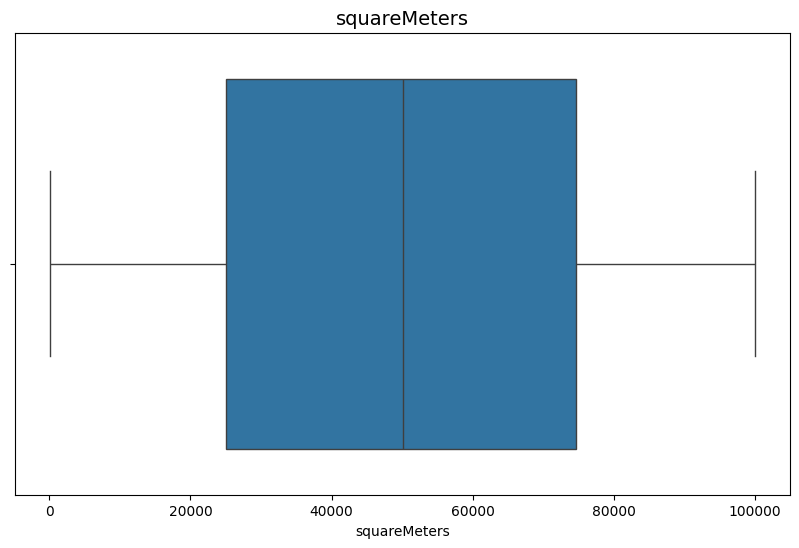

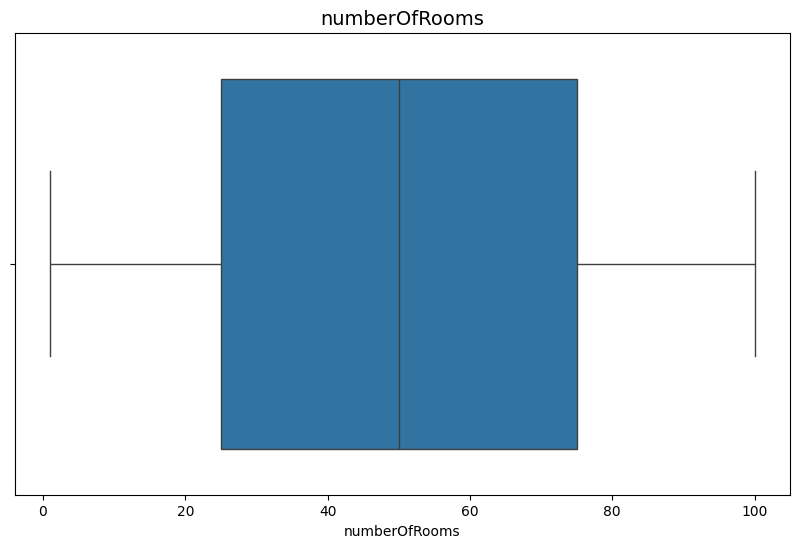

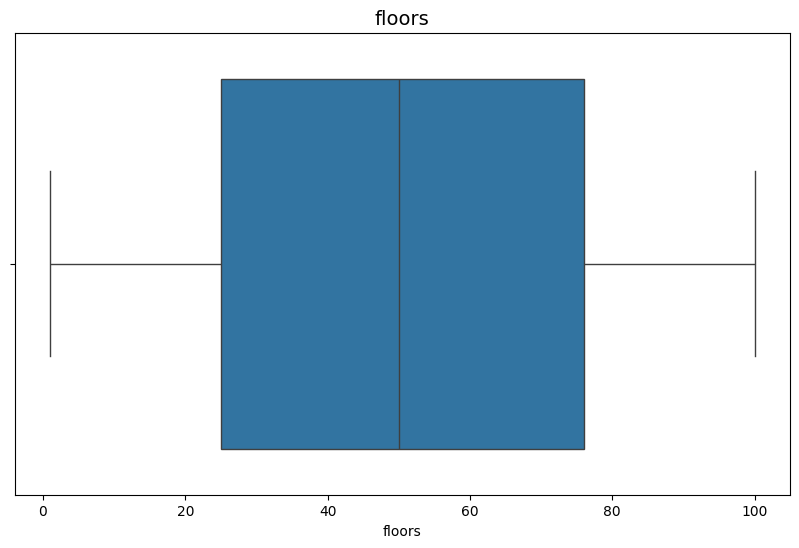

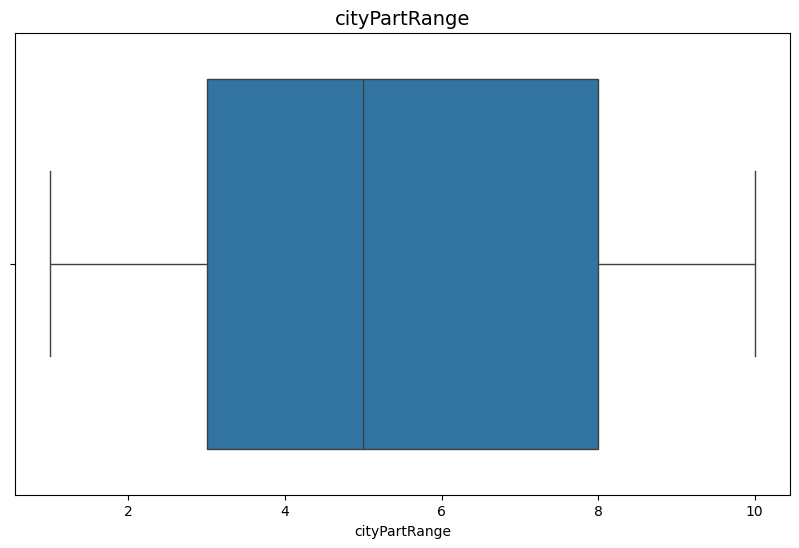

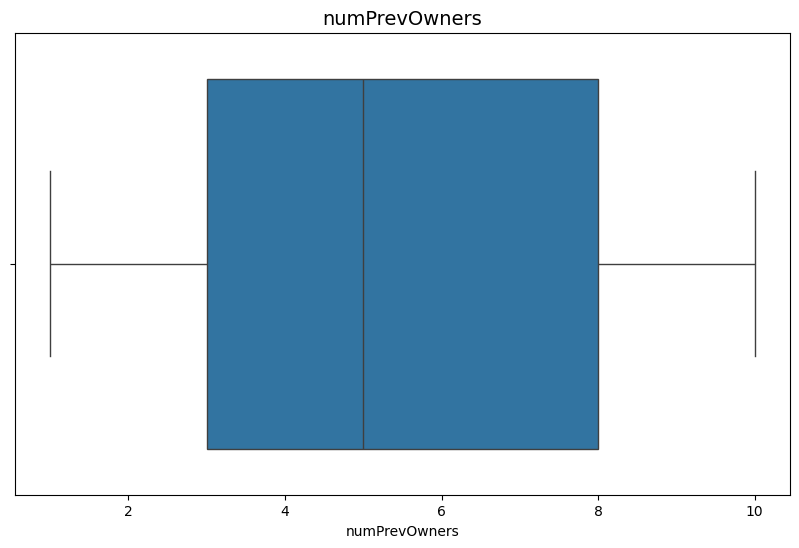

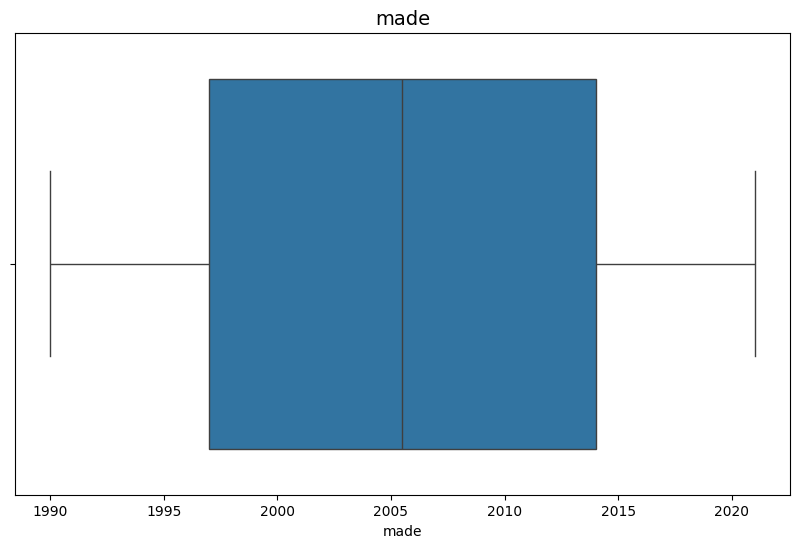

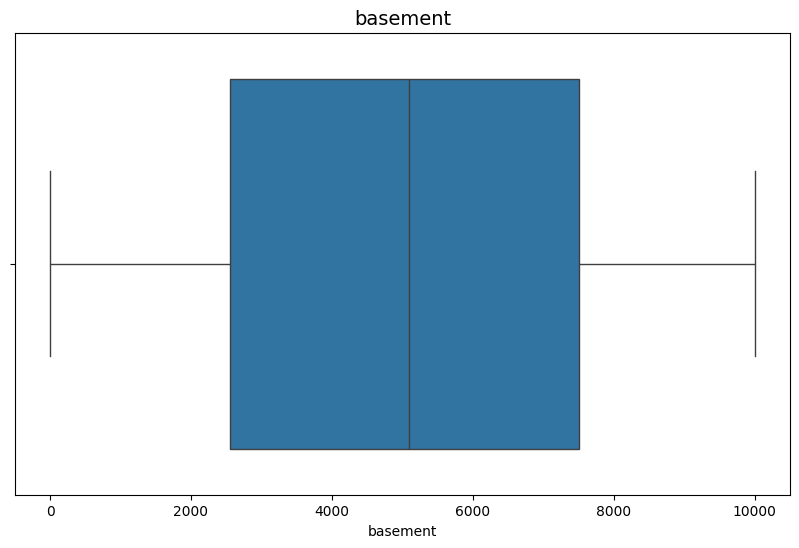

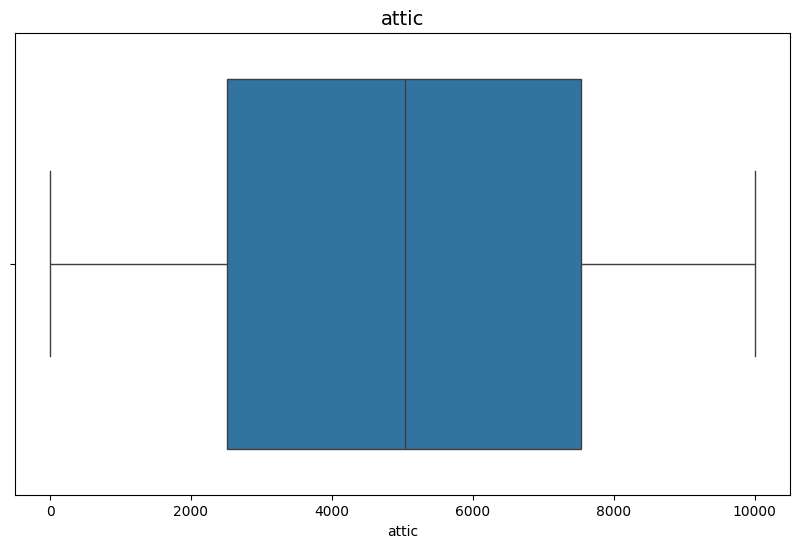

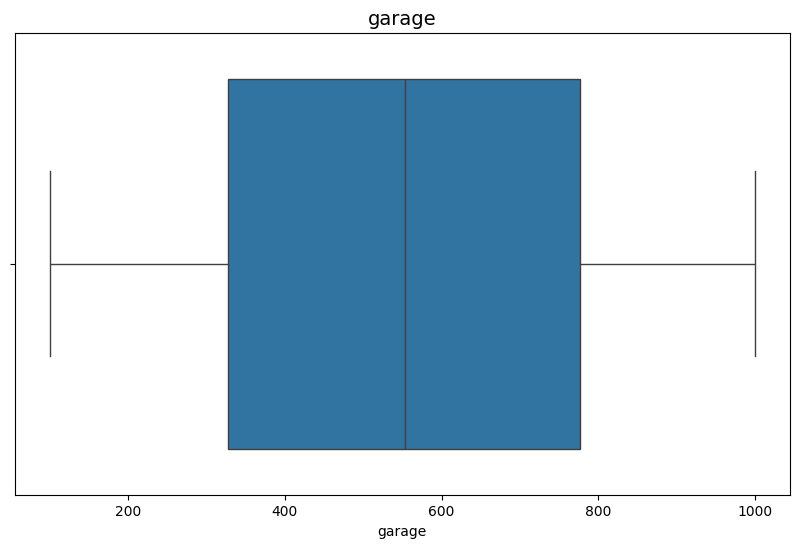

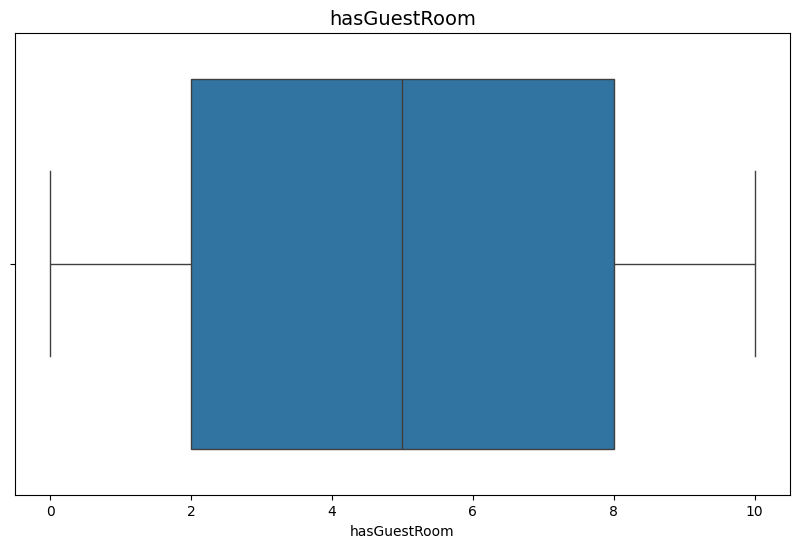

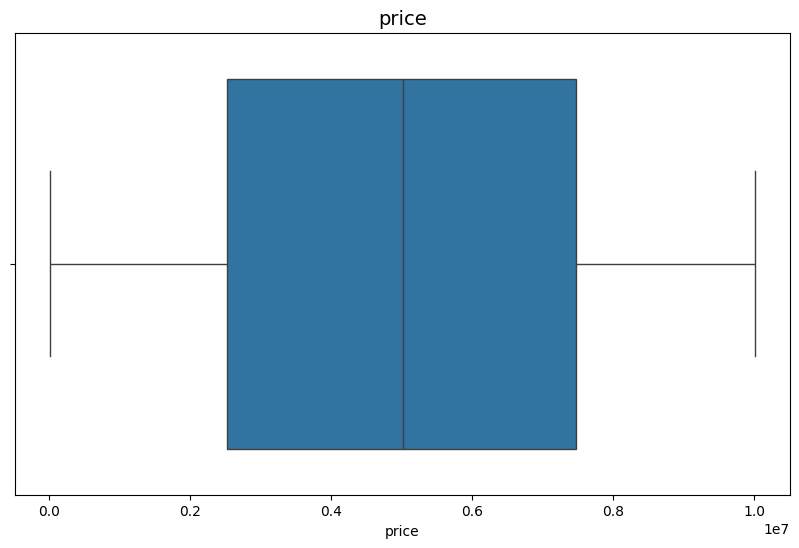

In [105]:
# Utilisation de la boîte à moustaches pour chaque variable concernée
variables = ['squareMeters', 'numberOfRooms', 'floors', 'cityPartRange', 'numPrevOwners',
             'made', 'basement', 'attic', 'garage', 'hasGuestRoom', 'price']

for var in variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=paris_housing_data[var])
    plt.title(f'{var}', fontsize=14)
    plt.xlabel(var)
    plt.show()

In [106]:
'''
# Détermination de la position des outliers pour "price"
outlier_threshold_price = paris_housing_data['price'].quantile(0.95)  # choix arbitraire du seuil à 95%
outliers_price = np.where(paris_housing_data['price'] > outlier_threshold_price)

print("Position des outliers pour 'price' :", outliers_price)
'''

'\n# Détermination de la position des outliers pour "price"\noutlier_threshold_price = paris_housing_data[\'price\'].quantile(0.95)  # choix arbitraire du seuil à 95%\noutliers_price = np.where(paris_housing_data[\'price\'] > outlier_threshold_price)\n\nprint("Position des outliers pour \'price\' :", outliers_price)\n'

In [129]:
# Utilisation du Score Z pour "price"
z_scores_price = np.abs(stats.zscore(paris_housing_data['price']))
threshold = 3  # seuil commun pour les outliers basé sur le score Z
outliers_z_score = np.where(z_scores_price > threshold)
print("Outliers basés sur le score Z pour 'price' :", outliers_z_score)

Outliers basés sur le score Z pour 'price' : (array([], dtype=int64),)


In [108]:
'''
# IQR pour "price"
Q1_price = np.percentile(paris_housing_data['price'], 25, interpolation = 'midpoint')
Q3_price = np.percentile(paris_housing_data['price'], 75, interpolation = 'midpoint')
IQR_price = Q3_price - Q1_price

upper_bound_price = paris_housing_data['price'] > (Q3_price + 1.5 * IQR_price)
lower_bound_price = paris_housing_data['price'] < (Q1_price - 1.5 * IQR_price)
print("Outliers basés sur IQR pour 'price' - Upper bound:", upper_bound_price.any())
print("Outliers basés sur IQR pour 'price' - Lower bound:", lower_bound_price.any())

# Suppression hypothétique des outliers
# paris_housing_data = paris_housing_data[~(upper_bound_price | lower_bound_price)]
# print("Dimensions du dataset après suppression des outliers :", paris_housing_data.shape)
'''

'\n# IQR pour "price"\nQ1_price = np.percentile(paris_housing_data[\'price\'], 25, interpolation = \'midpoint\')\nQ3_price = np.percentile(paris_housing_data[\'price\'], 75, interpolation = \'midpoint\')\nIQR_price = Q3_price - Q1_price\n\nupper_bound_price = paris_housing_data[\'price\'] > (Q3_price + 1.5 * IQR_price)\nlower_bound_price = paris_housing_data[\'price\'] < (Q1_price - 1.5 * IQR_price)\nprint("Outliers basés sur IQR pour \'price\' - Upper bound:", upper_bound_price.any())\nprint("Outliers basés sur IQR pour \'price\' - Lower bound:", lower_bound_price.any())\n\n# Suppression hypothétique des outliers\n# paris_housing_data = paris_housing_data[~(upper_bound_price | lower_bound_price)]\n# print("Dimensions du dataset après suppression des outliers :", paris_housing_data.shape)\n'

## Visualisation - Description des caractéristiques

In [109]:
# Conversion des booléens en numériques pour la visualisation
paris_housing_data['isNewBuilt'] = paris_housing_data['isNewBuilt'].astype(int)
paris_housing_data['hasStormProtector'] = paris_housing_data['hasStormProtector'].astype(int)
paris_housing_data['hasStorageRoom'] = paris_housing_data['hasStorageRoom'].astype(int)

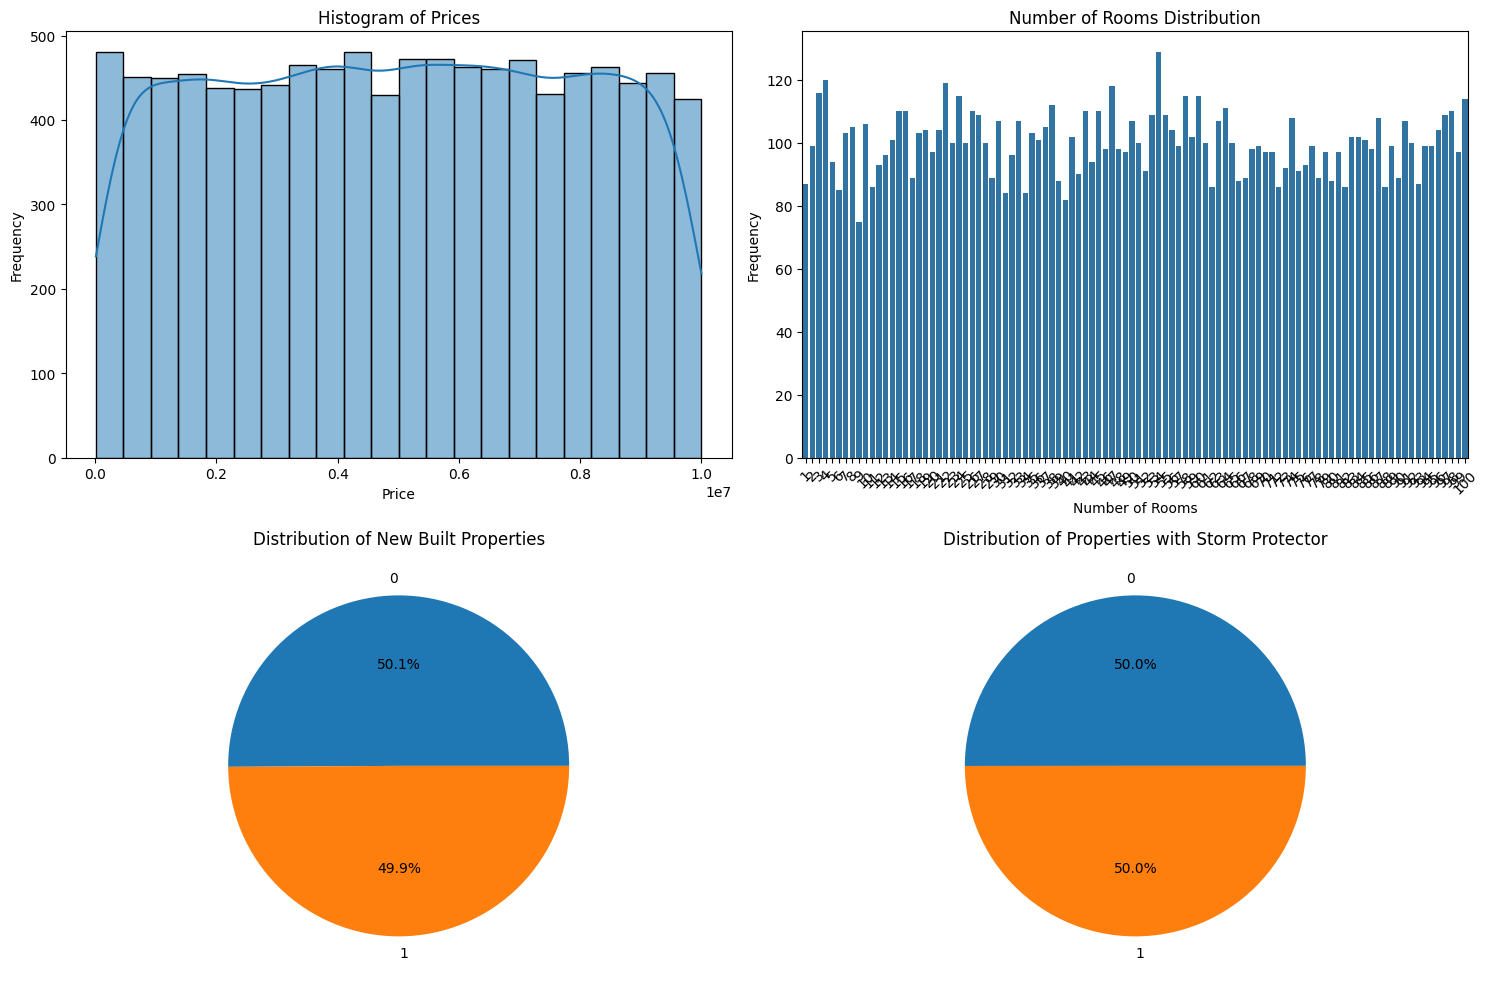

In [110]:
# Visualizations
plt.figure(figsize=(15, 10))

# Histogram for price
plt.subplot(2, 2, 1)
sns.histplot(paris_housing_data['price'], kde=True)
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Bar plot for number of rooms
plt.subplot(2, 2, 2)
room_counts = paris_housing_data['numberOfRooms'].value_counts()
sns.barplot(x=room_counts.index, y=room_counts.values)
plt.title('Number of Rooms Distribution')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Pie chart for isNewBuilt
plt.subplot(2, 2, 3)
isNewBuilt_counts = paris_housing_data['isNewBuilt'].value_counts()
plt.pie(isNewBuilt_counts, labels=isNewBuilt_counts.index, autopct='%1.1f%%')
plt.title('Distribution of New Built Properties')

# Pie chart for hasStormProtector
plt.subplot(2, 2, 4)
hasStormProtector_counts = paris_housing_data['hasStormProtector'].value_counts()
plt.pie(hasStormProtector_counts, labels=hasStormProtector_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Properties with Storm Protector')

plt.tight_layout()
plt.show()

In [111]:
# Encodage manuel des labels pour...

# ... 'category'
category_mapping_manual = {'Basic': 1, 'Luxury': 2}
paris_housing_data['category_encoded_manual'] = paris_housing_data['category'].map(category_mapping_manual)

# ... 'PoolAndYard'
pool_yard_mapping_manual = {
    'no pool and no yard': 1,
    'no pool and has yard': 2,
    'has pool and no yard': 3,
    'has pool and has yard': 4
}
paris_housing_data['PoolAndYard_encoded_manual'] = paris_housing_data['PoolAndYard'].map(pool_yard_mapping_manual)

In [112]:
# Affichage des premières lignes pour vérifier l'encodage
manual_encoded_data_head = paris_housing_data[['category', 'category_encoded_manual', 'PoolAndYard', 'PoolAndYard_encoded_manual']].head()
manual_encoded_data_head

,category,category_encoded_manual,PoolAndYard,PoolAndYard_encoded_manual
0,Basic,1,has pool and no yard,3
1,Luxury,2,has pool and has yard,4
2,Basic,1,has pool and no yard,3
3,Basic,1,no pool and no yard,1
4,Luxury,2,has pool and has yard,4


In [113]:
# Remplacement des colonnes originales par les colonnes encodées
paris_housing_data['category'] = paris_housing_data['category_encoded_manual']
paris_housing_data['PoolAndYard'] = paris_housing_data['PoolAndYard_encoded_manual']

# Suppression des colonnes encodées originales
del paris_housing_data['category_encoded_manual']
del paris_housing_data['PoolAndYard_encoded_manual']

In [119]:
# Calcul d'une matrice de corrélation
correlation_matrix = paris_housing_data.drop('cityCode', axis=1).corr()
correlation_matrix


,squareMeters,numberOfRooms,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
squareMeters,1.000000,0.009573,0.001109,0.008758,0.016619,-0.007207,-0.010667,0.007480,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999,-0.011800,-0.007928
numberOfRooms,0.009573,1.000000,0.022244,0.008340,0.016766,0.003978,-0.002865,-0.001656,-0.013990,0.012061,0.023188,-0.004760,-0.015529,0.009591,-0.000442,0.010131
floors,0.001109,0.022244,1.000000,-0.004921,0.002463,0.005022,0.002458,-0.008566,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654,-0.003827,-0.003954
cityPartRange,0.008758,0.008340,-0.004921,1.000000,0.009238,0.007748,-0.001874,0.005224,0.004743,0.010696,-0.001648,-0.011338,-0.007153,0.008813,-0.003171,0.015222
numPrevOwners,0.016619,0.016766,0.002463,0.009238,1.000000,0.006858,-0.017420,0.002522,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619,-0.012843,-0.004186
made,-0.007207,0.003978,0.005022,0.007748,0.006858,1.000000,-0.001678,-0.000645,-0.005506,0.013773,0.005687,-0.007868,-0.005431,-0.007210,0.005399,0.002667
isNewBuilt,-0.010667,-0.002865,0.002458,-0.001874,-0.017420,-0.001678,1.000000,0.003200,-0.015986,0.020127,0.002749,0.007011,0.019895,-0.010643,0.381237,-0.003552
hasStormProtector,0.007480,-0.001656,-0.008566,0.005224,0.002522,-0.000645,0.003200,1.000000,-0.005001,-0.003753,0.003758,0.001401,-0.006549,0.007496,0.002182,-0.004267
basement,-0.003960,-0.013990,0.006228,0.004743,-0.000862,-0.005506,-0.015986,-0.005001,1.000000,-0.003180,0.000117,-0.010815,-0.020732,-0.003967,-0.011310,-0.010264
attic,-0.000588,0.012061,-0.000270,0.010696,0.000719,0.013773,0.020127,-0.003753,-0.003180,1.000000,-0.000611,-0.000789,-0.011995,-0.000600,-0.005729,-0.011950


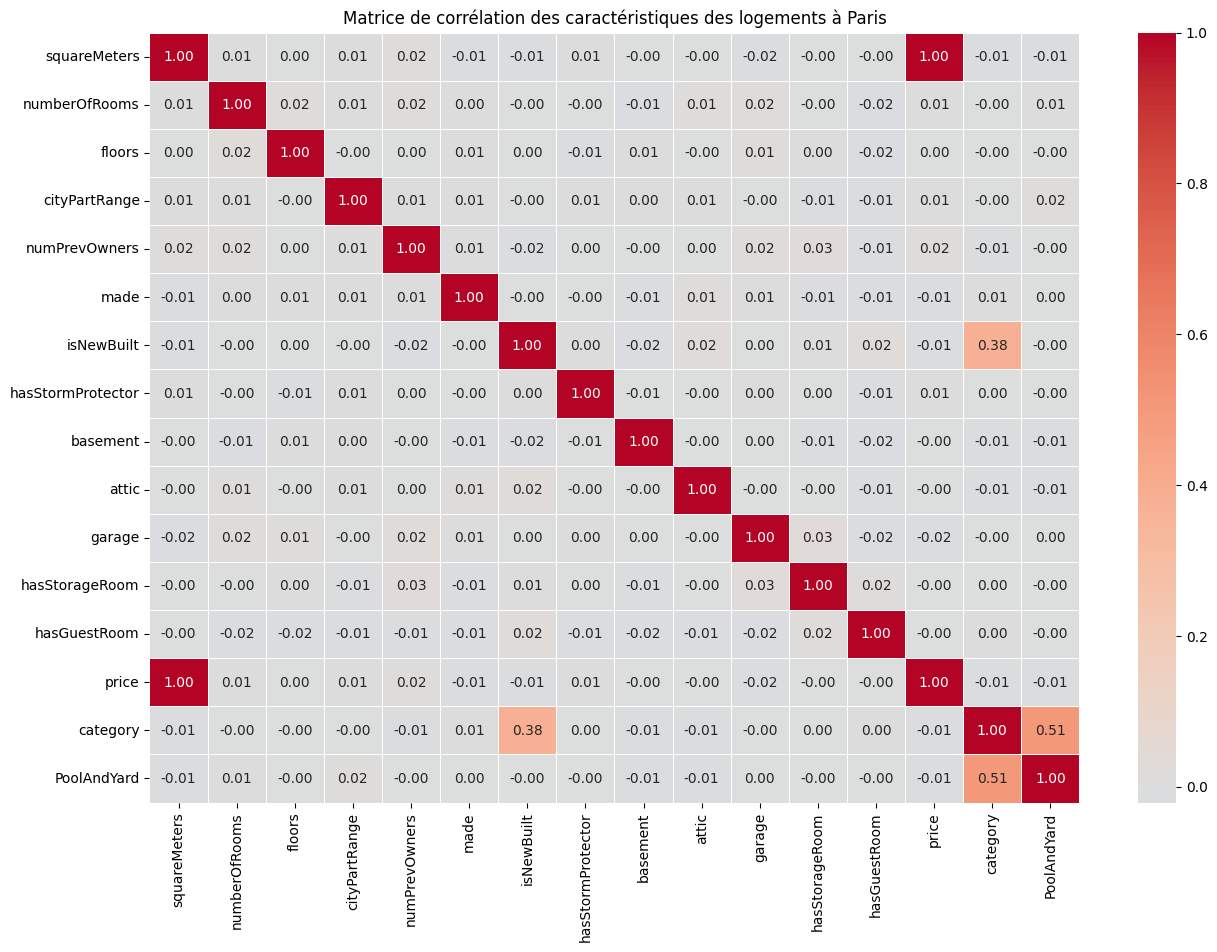

In [122]:
# Heatmap générée
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, center=0)
plt.title('Matrice de corrélation des caractéristiques des logements à Paris')
plt.show()

Par exemple, on observe que :

- **squareMeters** et **price** sont fortement corrélées positivement, ce qui est logique car on peut s'attendre à ce que des maisons plus grandes soient plus chères.

- **category** et **PoolAndYard** ont également une corrélation positive modérée, suggérant que les maisons de catégorie supérieure ont plus tendance à avoir une piscine et/ou un jardin.

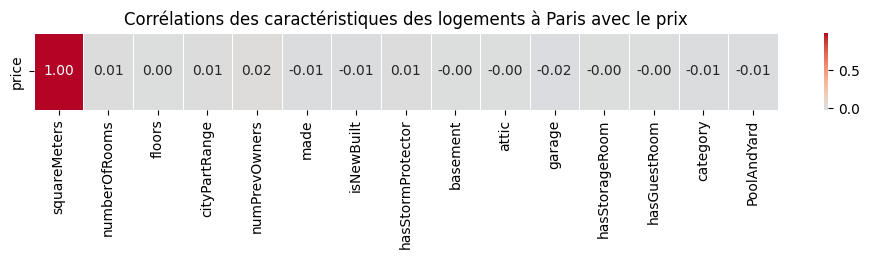

In [125]:
plt.figure(figsize=(12, 1))
sns.heatmap(correlation_matrix.drop(['price'], axis=0)[['price']].T, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, center=0)
plt.title('Corrélations des caractéristiques des logements à Paris avec le prix')
plt.show()

Parler du problème autour de ce jeu de données (trop parfait) !

In [ ]:
# Encodage manuel des labels pour...

# ... 'category'
category_mapping_manual = {'Basic': 1, 'Luxury': 2}
paris_housing_df['category_encoded_manual'] = paris_housing_df['category'].map(category_mapping_manual)

# ... 'PoolAndYard'
pool_yard_mapping_manual = {
    'no pool and no yard': 1,
    'no pool and has yard': 2,
    'has pool and no yard': 3,
    'has pool and has yard': 4
}
paris_housing_df['PoolAndYard_encoded_manual'] = paris_housing_df['PoolAndYard'].map(pool_yard_mapping_manual)


# ... 'isNewBuilt	hasStormProtector'

isNewBuilt_mapping_manual = {
    True: 1,
    False: 0,
}
paris_housing_df['isNewBuilt_manual'] = paris_housing_df['isNewBuilt'].map(isNewBuilt_mapping_manual)

hasStormProtector_mapping_manual = {
    True: 1,
    False: 0,
}
paris_housing_df['hasStormProtector_manual'] = paris_housing_df['hasStormProtector'].map(hasStormProtector_mapping_manual)



In [ ]:
hasStorageRoom_mapping_manual = {
    True: 1,
    False: 0,
}
paris_housing_df['hasStorageRoom_manual'] = paris_housing_df['hasStorageRoom'].map(hasStorageRoom_mapping_manual)

In [ ]:
# Remplacement des colonnes originales par les colonnes encodées
paris_housing_df['category'] =paris_housing_df['category_encoded_manual']
paris_housing_df['PoolAndYard'] = paris_housing_df['PoolAndYard_encoded_manual']
paris_housing_df['isNewBuilt'] = paris_housing_df['isNewBuilt_manual']
paris_housing_df['hasStormProtector'] = paris_housing_df['hasStormProtector_manual']
paris_housing_df['hasStorageRoom'] = paris_housing_df['hasStorageRoom_manual']

# Suppression des colonnes encodées originales
del paris_housing_df['category_encoded_manual']
del paris_housing_df['PoolAndYard_encoded_manual']
del paris_housing_df['hasStormProtector_manual']
del paris_housing_df['isNewBuilt_manual']
del paris_housing_df['hasStorageRoom']



In [ ]:
paris_housing_df = paris_housing_df['numberOfRooms'].drop

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

#on décide d'analyser le prix avec un arbre de décision
#la regression linéaire ne serait pas pertinente pour ce cas : en effet les corrélations linéaires très faibles 
#donne l'intuition d'une faible relation linéaire entre les variables 
#de plus la distribution des données est uniforme ce qui rendrait l'analyse par regression moins sensibles aux
#hypothèses de non normalités

y = paris_housing_df['price']
X = paris_housing_df.drop('price', axis=1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #On choisi un train de 80
#test de 20 : ici on a beaucoup de données on peut donc choisir de faire un train de 80 (4/5)

tree_model = DecisionTreeRegressor(random_state=123) #la seed est choisi aléatoirement
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test) 

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}') #On regarde la MSE afin de comparé avec d'autres modèle : lors qu'elle est minimale
#le modèle est puissant

plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.show()



In [ ]:
#on décide de faire une forêt aléatoire : en effet un des problème de l'arbre de décision est sa variance
#Un arbre de décision non contraint (c'est-à-dire un arbre qui peut devenir très profond et complexe) a tendance 
# à s'ajuster trop précisément aux données d'entraînement. Cela peut entraîner une variance élevée, signifiant que 
# de petites variations dans les données peuvent conduire à des modèles très différents. En d'autres termes, l'arbre de décision 
# peut être trop sensible aux spécificités des données d'entraînement.

#De plus l'arbre n'est pas robuste : sa  capacité à maintenir de bonnes performances sur des données qu'il n'a pas vu lors de l'entraînement est parfois mise à peril 
# car il peut être trop spécifique aux particularités de l'ensemble d'entraînement et ne pas généraliser efficacement à de nouvelles données. Ceci est du à sa variabilité élevée

y = paris_housing_df['price']
X = paris_housing_df.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création d'un modèle de forêt aléatoire
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Évaluation des performances du modèle
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Affichage de l'importance des caractéristiques
feature_importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nImportance des caractéristiques:")
print(feature_importance_df)

# Visualisation de quelques arbres de la forêt
plt.figure(figsize=(15, 10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=feature_names, rounded=True, fontsize=10)
plt.show()
